# Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import unicodedata
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings

In [2]:
data=pd.read_csv(r"dataset\eighteen_nineteen_university_datasets.csv",encoding='unicode_escape')
df=pd.DataFrame(data)
df.head()

,World Rank,Institution,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
0,1,Harvard University,USA,1,2,1,1,1,1,1,1,100.0
1,2,Stanford University,USA,2,10,3,2,10,4,3,2,96.7
2,3,Massachusetts Institute of Technology,USA,3,3,11,3,30,15,2,6,95.1
3,4,University of Cambridge,United Kingdom,1,5,19,6,12,8,6,19,94.0
4,5,University of Oxford,United Kingdom,2,9,25,10,9,5,7,4,93.2


In [3]:
data.shape

(1000, 12)

* The dataset has 12 columns and 1000 rows.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   World Rank            1000 non-null   int64  
 1   Institution           1000 non-null   object 
 2   Location              1000 non-null   object 
 3   National Rank         1000 non-null   int64  
 4   Quality of Education  1000 non-null   object 
 5   Alumni Employment     1000 non-null   object 
 6   Quality of Faculty    1000 non-null   object 
 7   Research Output       1000 non-null   object 
 8   Quality Publications  1000 non-null   object 
 9   Influence             1000 non-null   object 
 10  Citations             1000 non-null   object 
 11  Score                 1000 non-null   float64
dtypes: float64(1), int64(2), object(9)
memory usage: 93.9+ KB


In [5]:
df.dtypes

World Rank                int64
Institution              object
Location                 object
National Rank             int64
Quality of Education     object
Alumni Employment        object
Quality of Faculty       object
Research Output          object
Quality Publications     object
Influence                object
Citations                object
Score                   float64
dtype: object

* Some of the columns should be numerical, but they are marked as objects ==> there are some strings in numerical columns, and they need to be corrected.

In [6]:
data.isnull().sum()

World Rank              0
Institution             0
Location                0
National Rank           0
Quality of Education    0
Alumni Employment       0
Quality of Faculty      0
Research Output         0
Quality Publications    0
Influence               0
Citations               0
Score                   0
dtype: int64

In [7]:
df.describe(include="all")

,World Rank,Institution,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
count,1000.000000,1000,1000,1000.00000,1000,1000,1000,1000,1000,1000,1000,1000.000000
unique,NaN,1000,61,NaN,404,492,221,905,892,830,75,NaN
top,NaN,Harvard University,USA,NaN,-,> 1000,-,> 1000,> 1000,> 1000,898,NaN
freq,NaN,1,213,NaN,597,509,731,77,51,171,129,NaN
mean,500.500000,NaN,NaN,40.02300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.034300
std,288.819436,NaN,NaN,49.22871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.670858
min,1.000000,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.800000
25%,250.750000,NaN,NaN,6.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.500000
50%,500.500000,NaN,NaN,21.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.750000
75%,750.250000,NaN,NaN,51.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.300000


* Looking at the dataset, the data has lots of missing values, and there are some strings in numerical columns. The data has to be cleaned. 

In [8]:
categorical_cols = ['Institution', 'Location']
numerical_cols = [col for col in df.columns if col not in categorical_cols]
for col in numerical_cols:
    print(f"Unique values in {col}:")
    print(df[col].unique())
    print("-" * 40)

Unique values in World Rank:
[   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   54   55   56
   57   58   59   60   61   62   63   64   65   66   67   68   69   70
   71   72   73   74   75   76   77   78   79   80   81   82   83   84
   85   86   87   88   89   90   91   92   93   94   95   96   97   98
   99  100  101  102  103  104  105  106  107  108  109  110  111  112
  113  114  115  116  117  118  119  120  121  122  123  124  125  126
  127  128  129  130  131  132  133  134  135  136  137  138  139  140
  141  142  143  144  145  146  147  148  149  150  151  152  153  154
  155  156  157  158  159  160  161  162  163  164  165  166  167  168
  169  170  171  172  173  174  175  176  177  178  179  180  181  182
  183  184  185  186  187  188  189  190  191  1

* by scanning data, I realised there is - and >1000 strings in the numerical column, so we need to convert >1000 to numbers like 1001 and - into nan, but there has to be a better way to find these missing values.

# Data Processing

In [9]:
df[numerical_cols] = df[numerical_cols].replace({'-': np.nan, '>1000': 1001})
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')

In [10]:
df.dtypes

World Rank                int64
Institution              object
Location                 object
National Rank             int64
Quality of Education    float64
Alumni Employment       float64
Quality of Faculty      float64
Research Output         float64
Quality Publications    float64
Influence               float64
Citations               float64
Score                   float64
dtype: object

In [11]:
df.describe()

,World Rank,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
count,1000.000000,1000.00000,403.000000,491.000000,269.000000,923.000000,949.000000,829.000000,890.000000,1000.000000
mean,500.500000,40.02300,323.406948,441.993890,144.817844,467.364030,476.240253,431.827503,439.380899,75.034300
std,288.819436,49.22871,194.084118,285.376225,88.636986,274.986724,276.258988,264.498304,269.208806,4.670858
min,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,69.800000
25%,250.750000,6.00000,151.500000,197.500000,68.000000,231.500000,238.000000,208.000000,222.000000,71.500000
50%,500.500000,21.00000,321.000000,414.000000,140.000000,462.000000,475.000000,416.000000,405.000000,73.750000
75%,750.250000,51.00000,490.500000,672.500000,223.000000,693.500000,712.000000,633.000000,673.000000,77.300000
max,1000.000000,213.00000,666.000000,997.000000,303.000000,1000.000000,997.000000,997.000000,898.000000,100.000000


although we have 1000 rows the count in some columns are so low

In [12]:
df.head()

,World Rank,Institution,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
0,1,Harvard University,USA,1,2.0,1.0,1.0,1.0,1.0,1.0,1.0,100.0
1,2,Stanford University,USA,2,10.0,3.0,2.0,10.0,4.0,3.0,2.0,96.7
2,3,Massachusetts Institute of Technology,USA,3,3.0,11.0,3.0,30.0,15.0,2.0,6.0,95.1
3,4,University of Cambridge,United Kingdom,1,5.0,19.0,6.0,12.0,8.0,6.0,19.0,94.0
4,5,University of Oxford,United Kingdom,2,9.0,25.0,10.0,9.0,5.0,7.0,4.0,93.2


The names of some institutions are not completely written in English and may cause problems in future visualisation and coding; therefore, let's identify these incomplete words and correct them.

In [13]:
def find_unwanted_chars(series):
    " Find characters that are not letters, digits, spaces, or allowed punctuation. Returns a dict of index → set of unwanted characters."
    allowed_punctuation = set("-.,()&'")
    Unallowed_chars = {}
    for idx, value in series.items():
        weird = set()
        for char in str(value):
            cat = unicodedata.category(char)
            if not (
                cat.startswith('L') or  # Letter
                cat.startswith('N') or  # Number
                cat == 'Zs' or          # Space
                char in allowed_punctuation
            ):
                weird.add(char)
        if weird:
            Unallowed_chars[idx] = weird
    return Unallowed_chars
unwanted = find_unwanted_chars(df['Institution'])
for idx, chars in unwanted.items():
    print(f"Index {idx}: '{df.loc[idx, 'Institution']}' → Unwanted characters: {chars}")

Index 26: 'University of WisconsinMadison' → Unwanted characters: {'\x96'}
Index 31: 'University of Illinois at UrbanaChampaign' → Unwanted characters: {'\x96'}
Index 132: 'University of Colorado Denver | Anschutz Medical Campus' → Unwanted characters: {'|'}
Index 146: 'Technion  Israel Institute of Technology' → Unwanted characters: {'\x96'}
Index 189: 'University of MissouriColumbia' → Unwanted characters: {'\x96'}
Index 234: 'Indiana University  Purdue University Indianapolis' → Unwanted characters: {'\x96'}
Index 312: 'University of NebraskaLincoln' → Unwanted characters: {'\x96'}
Index 488: 'University of Tromsø  The Arctic University of Norway' → Unwanted characters: {'\x96'}
Index 571: 'University of WisconsinMilwaukee' → Unwanted characters: {'\x96'}
Index 668: 'Rutgers UniversityNewark' → Unwanted characters: {'\x96'}
Index 728: 'University of MissouriKansas City' → Unwanted characters: {'\x96'}
Index 739: 'Bo?aziçi University' → Unwanted characters: {'?'}
Index 740:

In [14]:
# these unwanted chars need to be replaced by checking the real name of those institutions, we realised they have to be filled with -, but filling with - causes warnings in the following notebook, so we decided to fill these spaces with _
def replace_specific_unwanted(text, target_chars={'\x96'}, replacement='_'):
    return ''.join(
        replacement if char in target_chars else char
        for char in str(text)
    )
# for the entire column of Institution
df['Institution_cleaned'] = df['Institution'].apply(lambda x: replace_specific_unwanted(x))
print(df[df['Institution'] != df['Institution_cleaned']][['Institution', 'Institution_cleaned']])

                                           Institution  \
26                     University of WisconsinMadison   
31          University of Illinois at UrbanaChampaign   
146          Technion  Israel Institute of Technology   
189                    University of MissouriColumbia   
234  Indiana University  Purdue University Indiana...   
312                     University of NebraskaLincoln   
488  University of Tromsø  The Arctic University o...   
571                  University of WisconsinMilwaukee   
668                          Rutgers UniversityNewark   
728                 University of MissouriKansas City   

                                   Institution_cleaned  
26                     University of Wisconsin_Madison  
31          University of Illinois at Urbana_Champaign  
146          Technion _ Israel Institute of Technology  
189                    University of Missouri_Columbia  
234  Indiana University _ Purdue University Indiana...  
312                

In [15]:
def replace_specific_unwanted(text, target_chars={'\x92'}, replacement=','):
    return ''.join(
        replacement if char in target_chars else char
        for char in str(text)
    )

# Apply to the entire Institution column
df['Institution_cleaned'] = df['Institution'].apply(lambda x: replace_specific_unwanted(x))
print(df[df['Institution'] != df['Institution_cleaned']][['Institution', 'Institution_cleaned']])

                        Institution             Institution_cleaned
905  Gabriele dAnnunzio University  Gabriele d,Annunzio University


In [16]:
print(df.columns.tolist())

['World Rank', 'Institution', 'Location', 'National Rank', 'Quality\xa0of Education', 'Alumni Employment', 'Quality\xa0of Faculty', 'Research Output', 'Quality Publications', 'Influence', 'Citations', 'Score', 'Institution_cleaned']


In [17]:
df.columns = df.columns.str.replace('\xa0', ' ').str.strip()
print(df.columns.tolist())

['World Rank', 'Institution', 'Location', 'National Rank', 'Quality of Education', 'Alumni Employment', 'Quality of Faculty', 'Research Output', 'Quality Publications', 'Influence', 'Citations', 'Score', 'Institution_cleaned']


___

* Previously, we filled the - with nan in our dataset, since we need to visualise data and they are important columns, to avoid overlapping with the data we have, and also have a reasonable dataset, the nan data will be filled with the maximum value of its column +1.


In [18]:
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]): # find numeric columns
        max_val = df[col].max() # maximum value of each column
        df[col] = df[col].fillna(max_val + 1) # fill nan with maximum value of column+1

In [19]:
df.describe()

,World Rank,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.02300,528.532000,725.001000,261.180000,508.454000,502.850000,528.643000,489.939000,75.034300
std,288.819436,49.22871,208.781322,342.466554,84.233419,300.080433,292.595057,321.668846,291.882474,4.670858
min,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,69.800000
25%,250.750000,6.00000,405.750000,425.750000,282.750000,250.750000,250.750000,250.750000,240.000000,71.500000
50%,500.500000,21.00000,667.000000,998.000000,304.000000,500.500000,500.500000,502.500000,460.000000,73.750000
75%,750.250000,51.00000,667.000000,998.000000,304.000000,754.250000,750.250000,814.750000,673.000000,77.300000
max,1000.000000,213.00000,667.000000,998.000000,304.000000,1001.000000,998.000000,998.000000,899.000000,100.000000


* Now the data is cleaned and we move to having plots out of them

# Data Visualization

In [20]:
df

,World Rank,Institution,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score,Institution_cleaned
0,1,Harvard University,USA,1,2.0,1.0,1.0,1.0,1.0,1.0,1.0,100.0,Harvard University
1,2,Stanford University,USA,2,10.0,3.0,2.0,10.0,4.0,3.0,2.0,96.7,Stanford University
2,3,Massachusetts Institute of Technology,USA,3,3.0,11.0,3.0,30.0,15.0,2.0,6.0,95.1,Massachusetts Institute of Technology
3,4,University of Cambridge,United Kingdom,1,5.0,19.0,6.0,12.0,8.0,6.0,19.0,94.0,University of Cambridge
4,5,University of Oxford,United Kingdom,2,9.0,25.0,10.0,9.0,5.0,7.0,4.0,93.2,University of Oxford
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Aga Khan University,Pakistan,3,667.0,998.0,304.0,1001.0,998.0,464.0,673.0,69.8,Aga Khan University
996,997,University of Calcutta,India,17,353.0,716.0,296.0,798.0,966.0,998.0,899.0,69.8,University of Calcutta
997,998,K?chi University,Japan,56,667.0,998.0,304.0,1001.0,998.0,811.0,673.0,69.8,K?chi University
998,999,Soonchunhyang University,South Korea,35,667.0,998.0,304.0,881.0,998.0,998.0,898.0,69.8,Soonchunhyang University


___

Where are these top universities located? How is the distribution of top universities around the world.

In [21]:
pip install -U kaleido

Kaleido is installed


C:\Users\Afroo\AppData\Local\Temp\ipykernel_8876\1824026732.py:5: DeprecationWarning: The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.
  fig = px.scatter_geo(df_grouped,


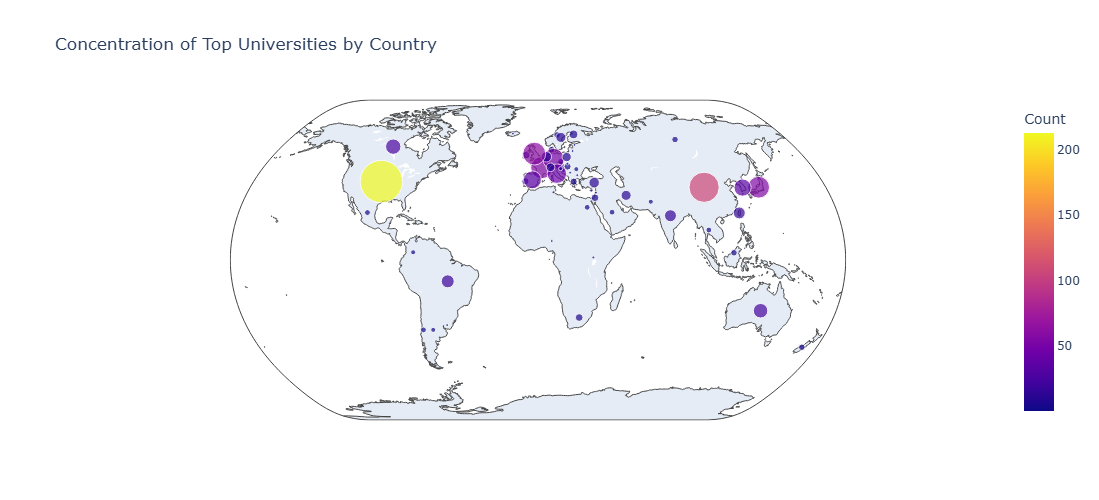

In [22]:
# the data contains country name --> location is name of country
import kaleido
print("Kaleido is installed")
df_grouped = df.groupby('Location').size().reset_index(name='Count') # the size of the bubble, where there are more universities, there should be bigger
fig = px.scatter_geo(df_grouped,
                     locations='Location',
                     locationmode='country names',
                     size='Count',               # Bubble size = number of universities
                     color='Count',              # Color intensity by count
                     hover_name='Location',
                     title='Concentration of Top Universities by Country',
                     projection='natural earth',
                     size_max=30)                # scales of bubbles

fig.update_layout(height=500, width=700)        # size of map
fig.write_image("Figures/university_map.png")
fig.show()


* Depending on the size of bubbles, we can understand which countries have the most top universities.

____

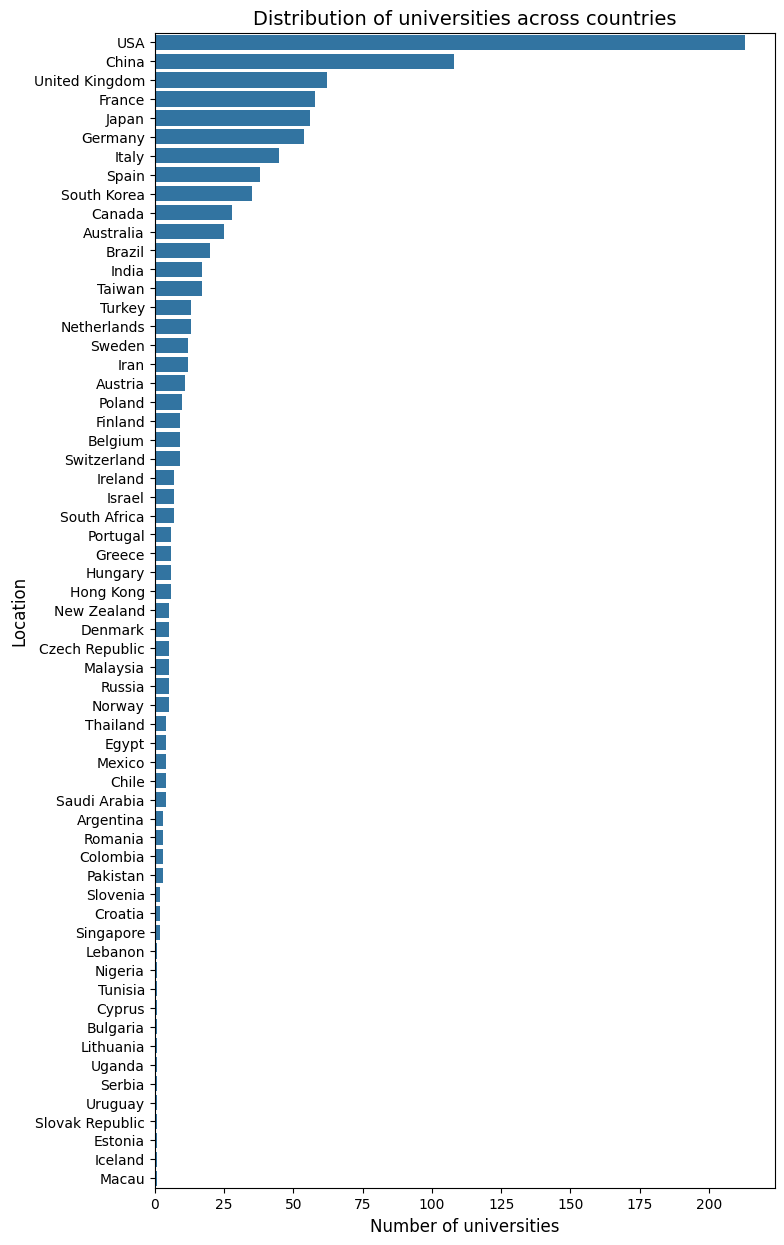

In [24]:
# to visualise better how many universities each country has
uni_df = df['Institution_cleaned'].value_counts()
fig, ax = plt.subplots(figsize=(8,15))
sns.countplot(data=df, y='Location', order=df.Location.value_counts().index);
plt.xlabel('Number of universities', fontsize=12)
plt.ylabel('Location', fontsize=12)
plt.savefig("Figures/university_distribution.png", dpi=300, bbox_inches="tight")
plt.title("Distribution of universities across countries", fontsize=14);

where are the top 10 countires having the best universities

In [25]:
country_counts = df['Location'].value_counts()
top_countries = country_counts.head(10)
print(top_countries)

Location
USA               213
China             108
United Kingdom     62
France             58
Japan              56
Germany            54
Italy              45
Spain              38
South Korea        35
Canada             28
Name: count, dtype: int64


____

* Based on the data, all features except scores with lower rankings are better. However, for visualization, this causes some confusion, as I personally find that higher values are generally preferable for comparison. For the next visualisation, I changed this to show higher is better.

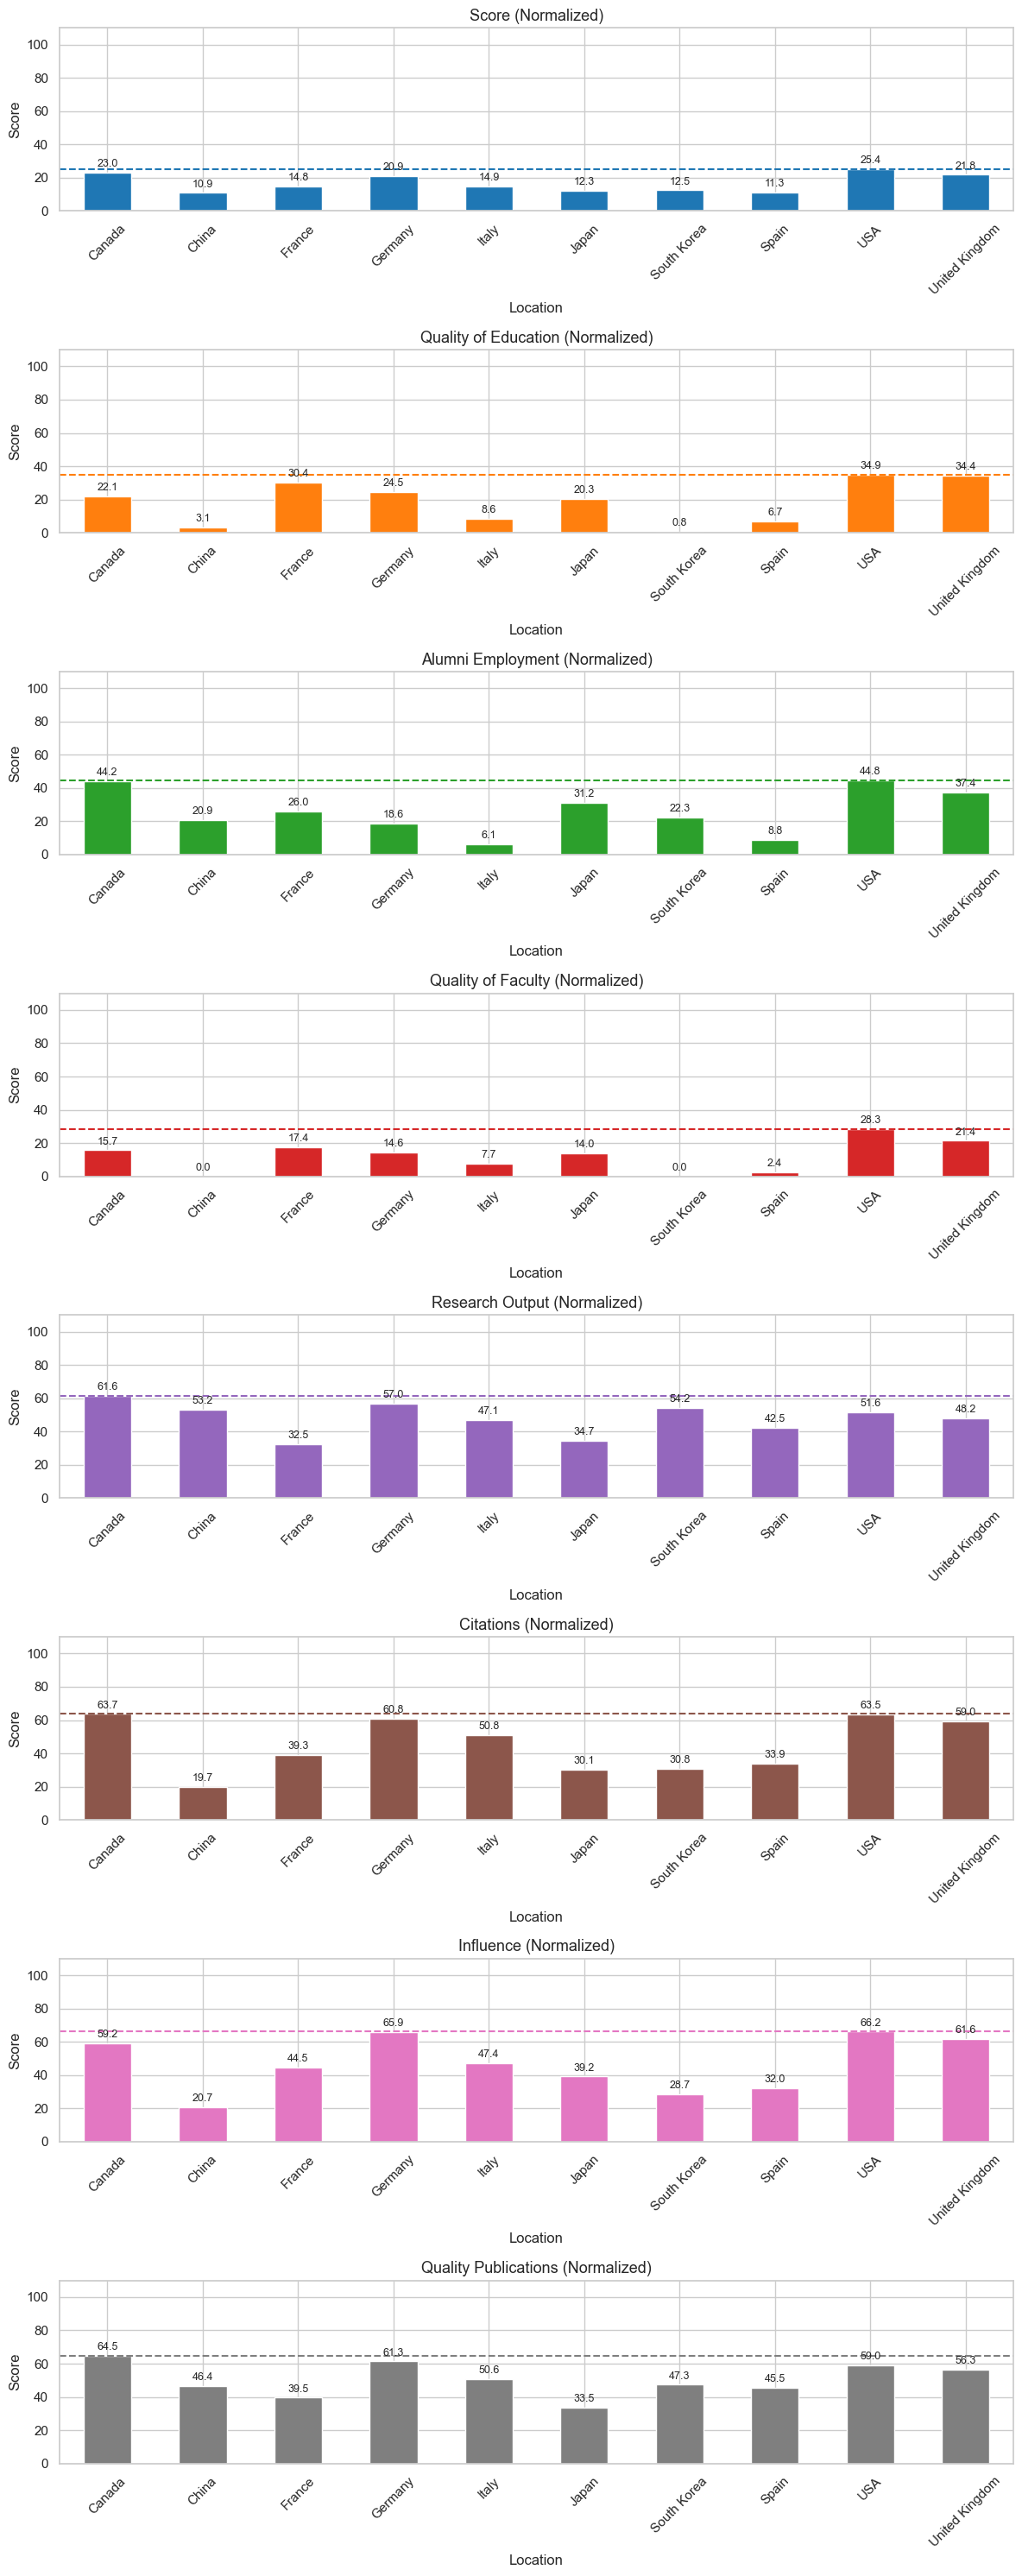

In [26]:
features = ['Score', 'Quality of Education', 'Alumni Employment', 'Quality of Faculty','Research Output', 'Citations', 'Influence', 'Quality Publications']
# Which features are ranking-based? meaning that lower is better.
ranking_features = ['Quality of Education', 'Alumni Employment', 'Quality of Faculty','Research Output', 'Citations', 'Influence', 'Quality Publications']
# We are interested only in the top 10 countries and not all data. 
top_countries_df = df[df['Location'].isin(top_countries.index)].copy()
#For better understanding and visualization, we'd like to reverse the ranking, meaning a higher value will have a better ranking.
for feature in ranking_features:
    top_countries_df[feature] = top_countries_df[feature].max() - top_countries_df[feature] + 1 # find the max of coulmn and subtract all values--> higher score better
# All values will be normalized to 0–100
scaler = MinMaxScaler(feature_range=(0, 100))
top_countries_df[features] = scaler.fit_transform(top_countries_df[features])
# visualization
# mean calculation and grouped by country
avg_scores = top_countries_df.groupby('Location')[features].mean()
# Plots of each feature in its own subplot
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(12, 30))

for i, feature in enumerate(features):
    ax = axes[i]
    color = sns.color_palette("tab10")[i % 10]
    bars = avg_scores[feature].plot(kind='bar', ax=ax, color=color)
    # line passes through maximum of each feature, so the difference between the top country in a specific feature and other countries will be shown
    ax.axhline(avg_scores[feature].max(), linestyle='--', color=color, linewidth=1.5)
    ax.set_title(f'{feature} (Normalized)', fontsize=13)
    ax.set_ylabel('Score')
    ax.set_ylim(0, 110)  # Slightly above 100 to make room for labels
    ax.tick_params(axis='x', rotation=45)
    # score labels on top of each bar
    for idx, value in enumerate(avg_scores[feature]):
        ax.text(idx, value + 2, f'{value:.1f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig("Figures/Features.png", dpi=300, bbox_inches="tight")
plt.show()


These graphs reveal some compelling insights:
- Overall Score: The United States leads all countries, with Canada securing a strong second place.
- Quality of Education: The U.S. ranks highest, closely followed by the United Kingdom with only a slight margin.
- Alumni Employment: Again, the U.S. takes the top spot, with Canada coming in second.
- Quality of Faculty: The U.S. maintains its lead, while the UK ranks second and Canada third.
- Research Output: Canada outperforms all other countries, followed by Germany in second and South Korea in third.
- Citations: Canada also leads in citation impact, which aligns with its high research output. Interestingly, the U.S. ranks second in citations despite being third in research volume — suggesting that American research may have higher visibility or influence than South Korea’s.
- Influence: Germany holds the highest score in this category, indicating strong global academic or institutional impact.
- Quality of Publications: Canada tops this metric as well, reinforcing its position as a powerhouse for research and academic excellence.


___

What is national rank? National rank refers to a university's position within in its own country 

<function matplotlib.pyplot.show(close=None, block=None)>

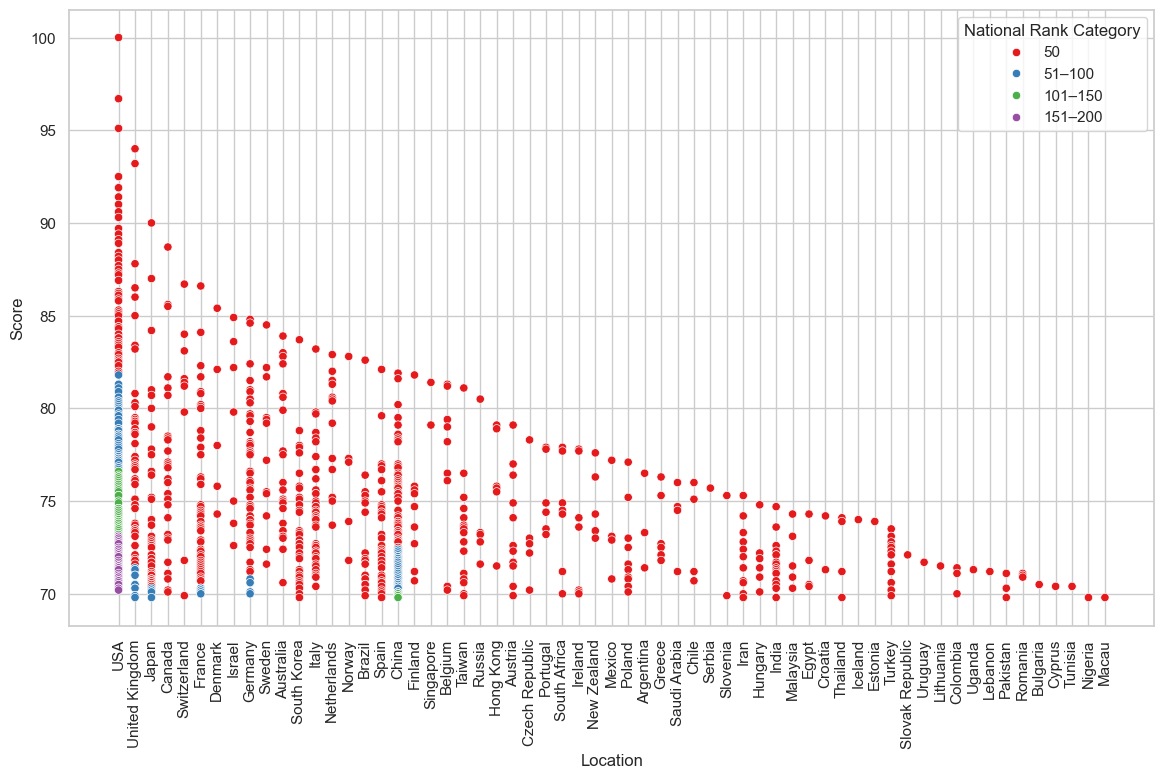

In [27]:
# We would like to compare the scores of universities based on their location and national ranking. 
# Since the national ranks are too tight, it is better to categorize them into groups.
plt.figure(figsize=(14,8))
df['National Rank Category'] = pd.cut(df['National Rank'], bins=[0, 50, 100, 150, 200], labels=['50', '51–100', '101–150', '151–200'])
sns.scatterplot(data=df, x='Location', y='Score', hue='National Rank Category', palette='Set1')
plt.xticks(rotation=90)
plt.savefig("Figures/University Scores.png", dpi=300, bbox_inches="tight")
plt.show

What does the graph show?
In many countries, the top national universities don’t rank very high globally. Their scores are usually between 70 and 80, which means even the best university in a country, like Sharif University in Iran, might not be among the top universities in the world.
But in the United States, universities with similar scores (around 70–75) often have national ranks between 151 and 200. This shows that even mid-ranked universities in the USA or China perform better globally than the top universities in many other countries. So, having a high national rank doesn’t always mean a university is strong on the global scale.


____

for me personally if I want to choose a university between top 50 universities, I would choose the university with higher Alumni employment, but let's find out if this factor is related to other aspects of the university. 

In [28]:
top50 = df.sort_values(by='World Rank').head(50)

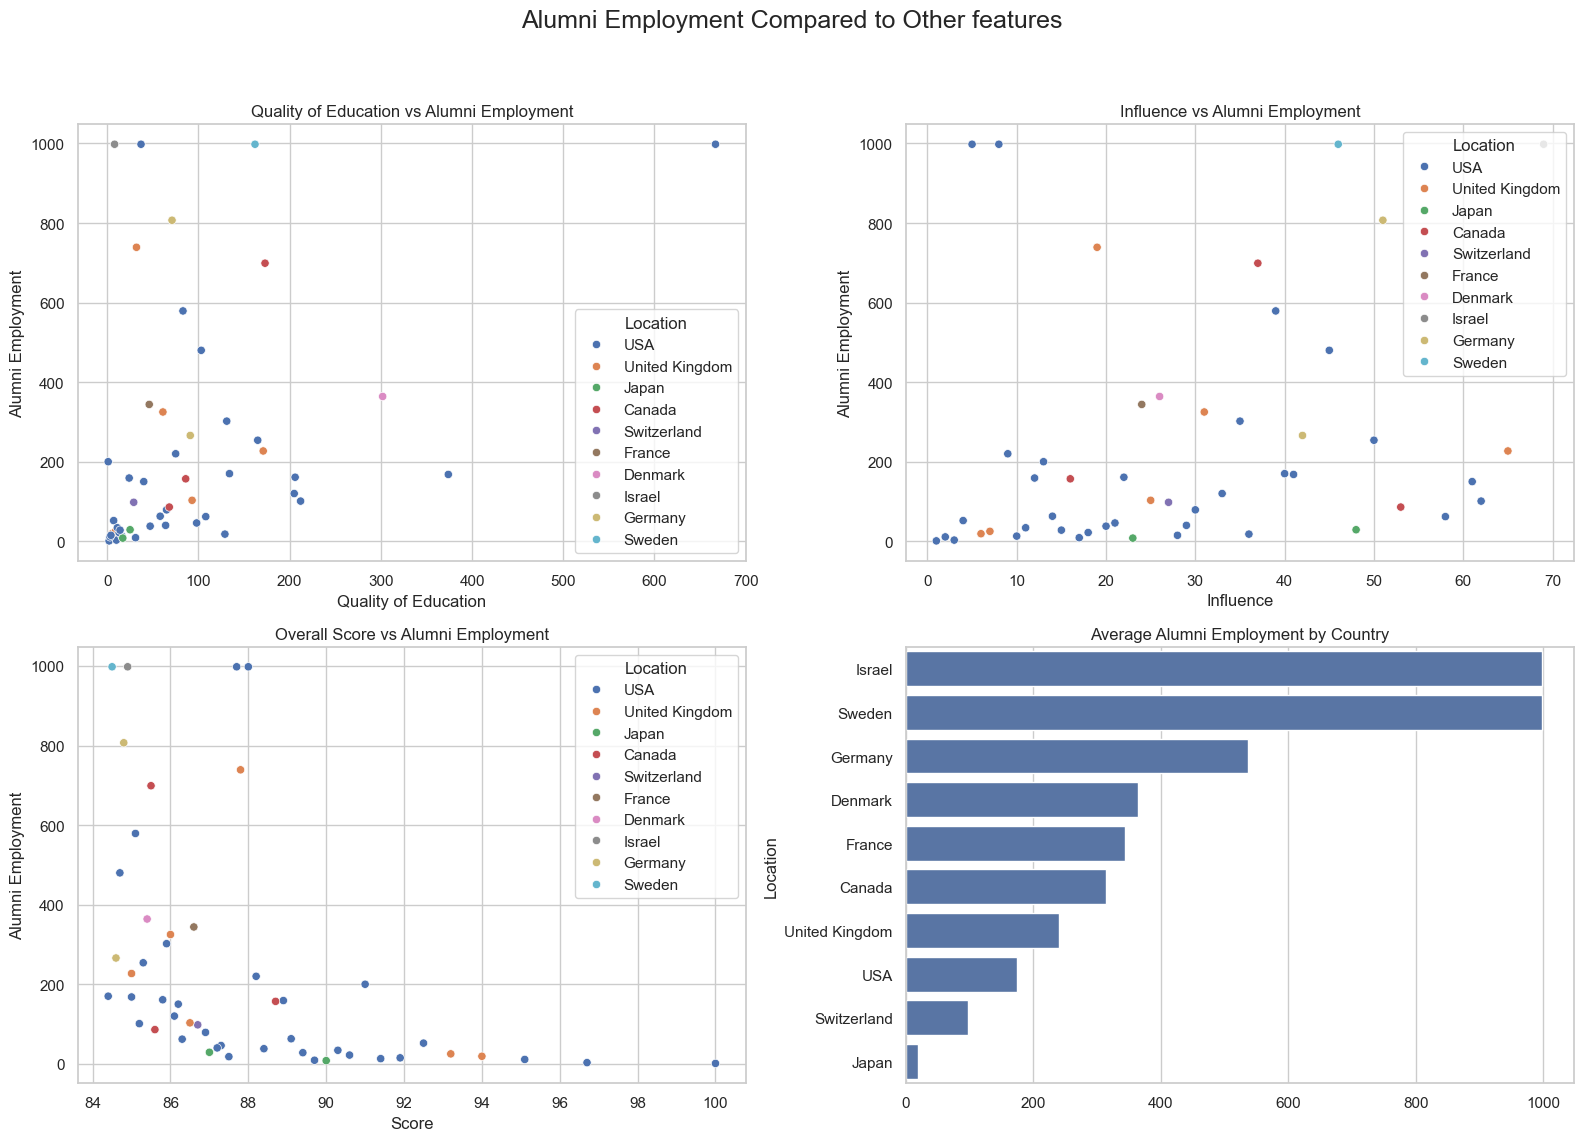

In [29]:
# subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Alumni Employment Compared to Other features", fontsize=18)
# Alumni Employment vs Quality of Education
sns.scatterplot(data=top50, x='Quality of Education', y='Alumni Employment', hue='Location', ax=axes[0,0])
axes[0, 0].set_title("Quality of Education vs Alumni Employment")
# Alumni Employment vs Influence
sns.scatterplot(data=top50, x='Influence', y='Alumni Employment',hue='Location', ax=axes[0, 1])
axes[0, 1].set_title("Influence vs Alumni Employment")
# Alumni Employment vs Score
sns.scatterplot(data=top50, x='Score', y='Alumni Employment',hue='Location', ax=axes[1, 0])
axes[1, 0].set_title("Overall Score vs Alumni Employment")
# Alumni Employment by Location (Average per Country)
location_avg = top50.groupby('Location')['Alumni Employment'].mean().sort_values(ascending=False)
sns.barplot(x=location_avg.values, y=location_avg.index, ax=axes[1, 1])
axes[1, 1].set_title("Average Alumni Employment by Country")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("Figures/Top 50.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
israel_universities = top50[top50['Location'] == 'Israel']
israel_universities

This is interesting; for example, Israel has shown that although the rank of the university and score are good, the rate of Alumni employment is not good at all, meaning they face challenges in providing jobs in their country. Similarly, Sweden and Germany are also interesting, as they show that they face job market problems. 

From graphs, Sweden also does not have a perfect score, influenced by the quality of education. 

In [30]:
Japan_universities=top50[top50['Location']=='Japan']
Japan_universities

,World Rank,Institution,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score,Institution_cleaned,National Rank Category
11,12,University of Tokyo,Japan,1,17.0,8.0,33.0,7.0,17.0,23.0,29.0,90.0,University of Tokyo,50
25,26,Kyoto University,Japan,2,25.0,29.0,24.0,29.0,45.0,48.0,101.0,87.0,Kyoto University,50


When finding a top university, there are many factors to consider. Personally, I would choose the University of Tokyo, as it is not the best university, but its average outcome is the best.

___

We know USA has the most top universities among other countries lets compare these universities together. 

In [31]:
USA_Uni=top50[top50['Location']=='USA']
Features=['National Rank',	'Quality of Education',	'Alumni Employment',	'Quality of Faculty',	'Research Output',	'Quality Publications',	'Influence'	,'Citations']


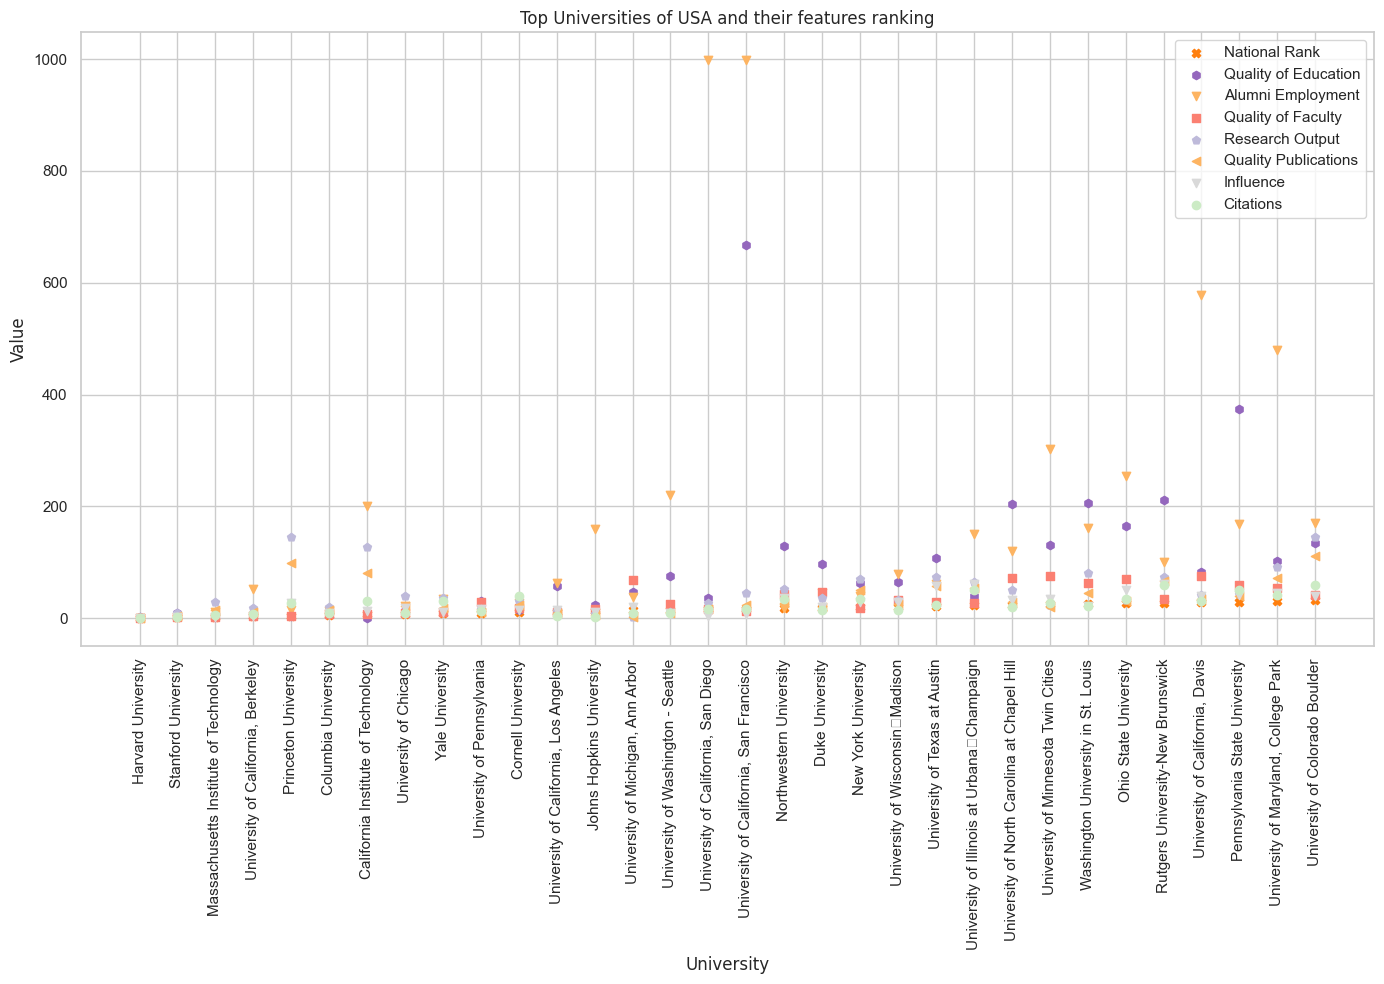

In [33]:
import random
warnings.filterwarnings("ignore", category=UserWarning)
color_pool = plt.cm.tab10.colors + plt.cm.Set3.colors  
marker_pool = ['o', 's', '^', 'D', 'v', '>', '<', 'p', '*', 'X', 'h']
plt.figure(figsize=(14, 10))

for feature in Features:
    color = random.choice(color_pool)
    marker = random.choice(marker_pool)
    plt.scatter(
        USA_Uni['Institution_cleaned'],
        USA_Uni[feature],
        label=feature,
        color=color,
        marker=marker
    )
plt.title('Top Universities of USA and their features ranking', fontname='DejaVu Sans')
plt.xlabel('University', fontname='DejaVu Sans')
plt.ylabel('Value', fontname='DejaVu Sans')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Figures/Top University of USA.png", dpi=300, bbox_inches="tight")
plt.show()

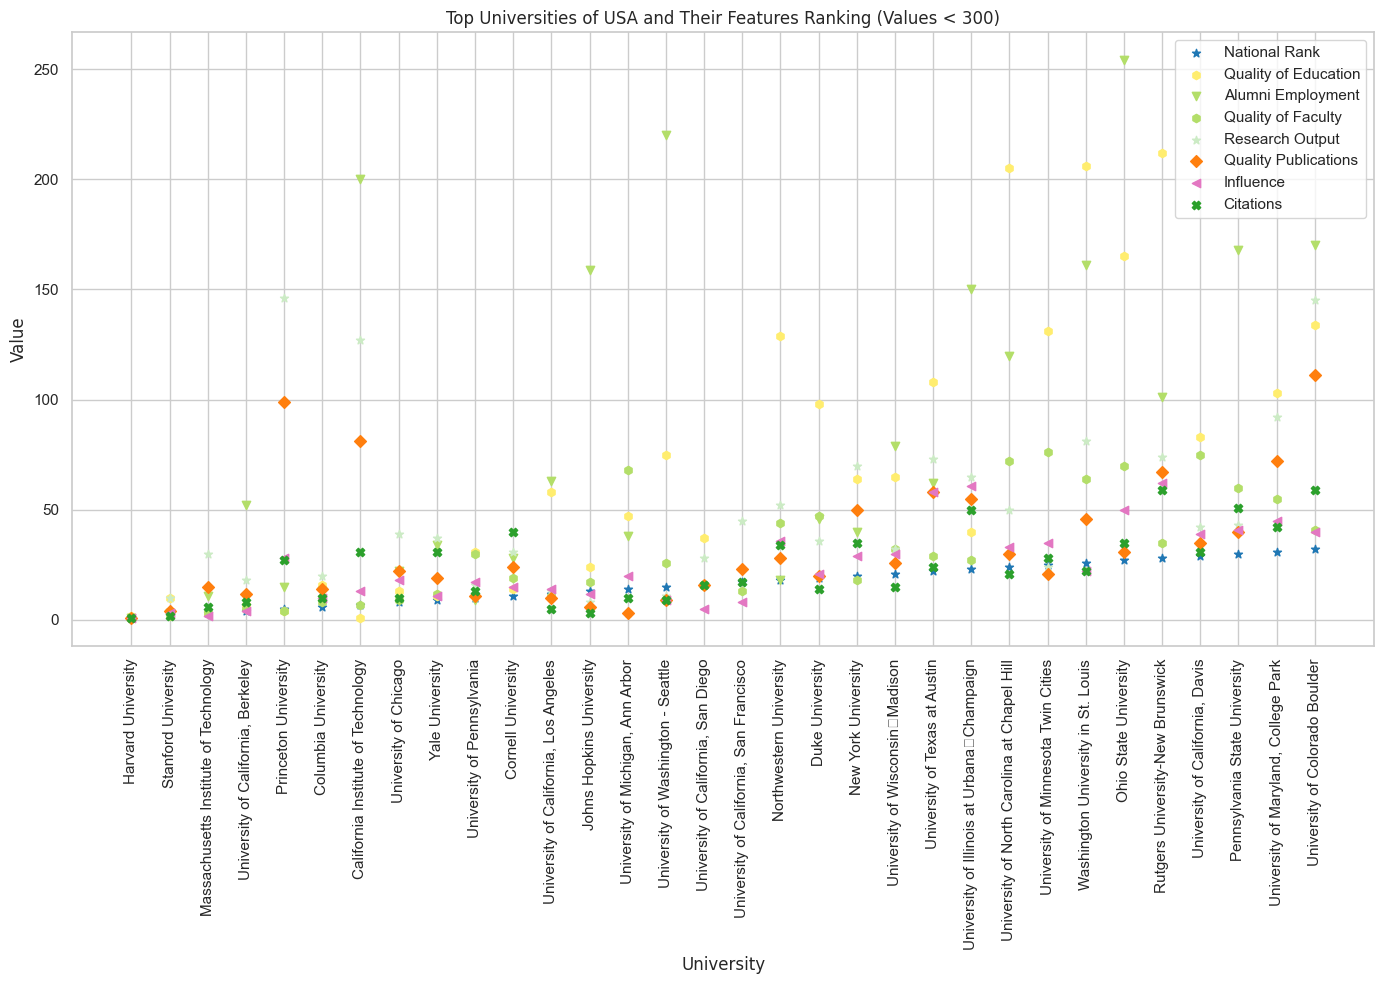

In [34]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
color_pool = plt.cm.tab10.colors + plt.cm.Set3.colors  
marker_pool = ['o', 's', '^', 'D', 'v', '>', '<', 'p', '*', 'X', 'h']
plt.figure(figsize=(14, 10))
for feature in Features:
    color = random.choice(color_pool)
    marker = random.choice(marker_pool)
    # Filter rows where the feature value is below 400 so we can zoom in
    filtered_data = USA_Uni[USA_Uni[feature] < 300]
    plt.scatter(
        filtered_data['Institution_cleaned'],
        filtered_data[feature],
        label=feature,
        color=color,
        marker=marker
    )

plt.title('Top Universities of USA and Their Features Ranking (Values < 300)', fontname='DejaVu Sans')
plt.xlabel('University', fontname='DejaVu Sans')
plt.ylabel('Value', fontname='DejaVu Sans')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Figures/Top University of USA Ranking below 300.png", dpi=300, bbox_inches="tight")
plt.show()

Now we can compare the top universities of USA together for instance, for harvard university all features are almost one but for University of Colorado Boulder the features have different rankings or for example, Ohio state university does not have a good ranking for Alumni employment so that could be for instance the university located in student city and not industerial city. 